In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load images

(376, 500, 3)


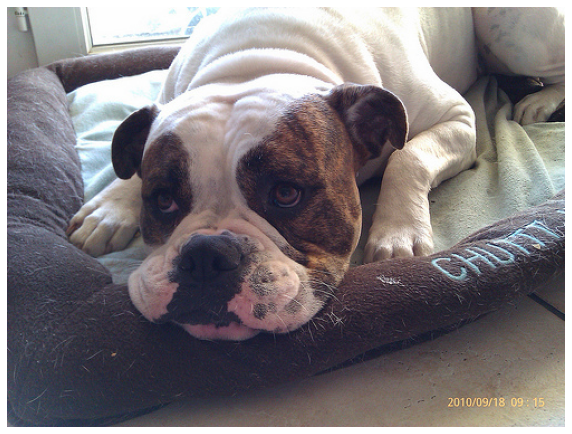

In [3]:
img = cv2.imread('input.jpg')
(h, w) = img.shape[:2]
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print(img.shape)

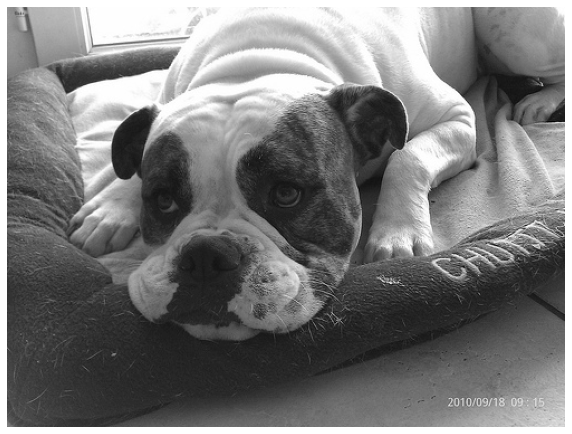

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(gray,cmap='gray')
gray = np.array(gray)


4313


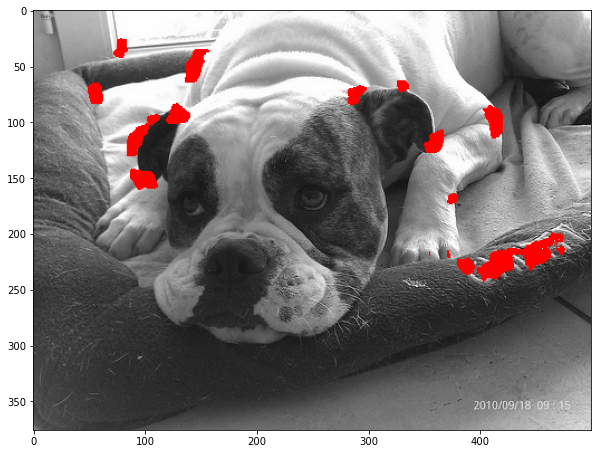

In [5]:
img_hcd_resp = cv2.cornerHarris(gray,20,5,0.04)
#result is dilated for marking the corners, not important
#hcd_resp = cv2.dilate(hcd_resp,None)
# Threshold for an optimal value, it may vary depending on the image.

img_corners = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

img_threshold = 0.25*img_hcd_resp.max()

img_corners[img_hcd_resp>img_threshold]=[0,0,255]

num_corners_img = np.sum(img_hcd_resp > img_threshold)
print(num_corners_img)

plt.figure(figsize = [10, 10])
plt.axis('on')
plt.imshow(cv2.cvtColor(img_corners, cv2.COLOR_BGR2RGB))

### Get Corners for all Images

In [32]:
def find_corners(img_name, plotFlag, block, ksize, k):

    img = cv2.imread(img_name)
    
    if(plotFlag):
        (h, w) = img.shape[:2]
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        print(img.shape)

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    if(plotFlag):
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(gray,cmap='gray')
        gray = np.array(gray)

    # cornerHarris(img, blockSize, ksize, k)
    #img_hcd_resp = cv2.cornerHarris(gray,20,5,0.04)
    img_hcd_resp = cv2.cornerHarris(gray, block, ksize, k)

    #result is dilated for marking the corners, not important
    #hcd_resp = cv2.dilate(hcd_resp,None)
    # Threshold for an optimal value, it may vary depending on the image.

    img_corners = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    img_threshold = 0.25*img_hcd_resp.max()

    img_corners[img_hcd_resp>img_threshold]=[0,0,255]

    num_corners_img = np.sum(img_hcd_resp > img_threshold)
    print(num_corners_img)

    plt.figure(figsize = [10, 10])
    plt.axis('on')
    plt.imshow(cv2.cvtColor(img_corners, cv2.COLOR_BGR2RGB))


430


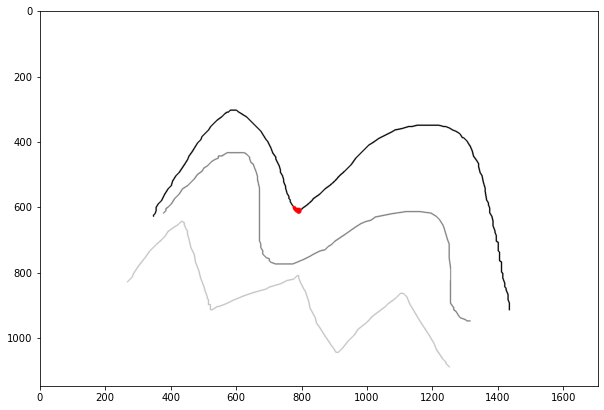

In [45]:
find_corners("test2.png", 0, 20, 5, 0.04)

Find Corners for Cats

2425
1077
895
3465


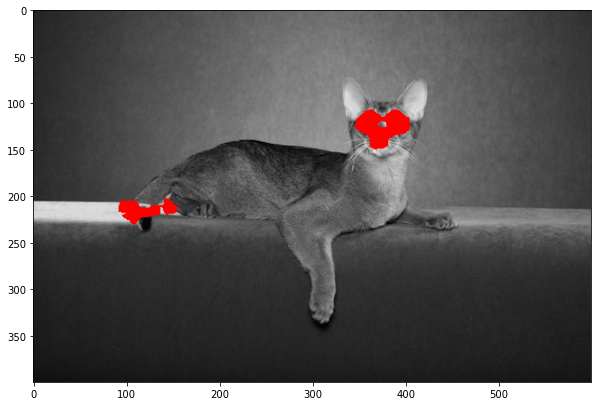

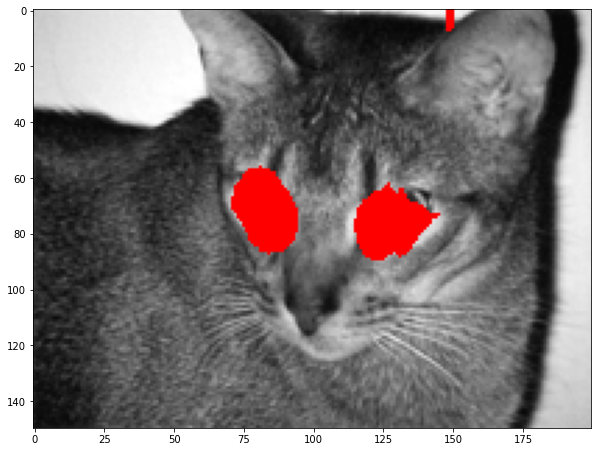

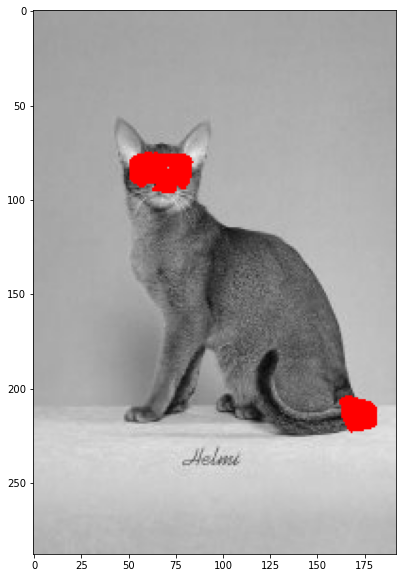

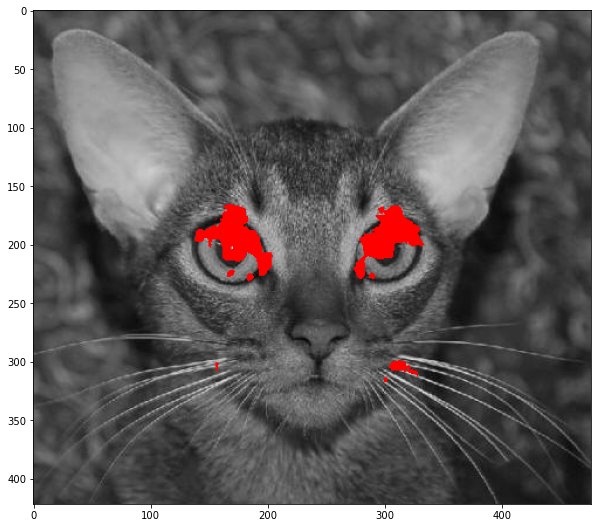

In [8]:
find_corners("Abyssinian_1.jpg", 0.3)
find_corners("Abyssinian_5.jpg", 0.3)
find_corners("Abyssinian_11.jpg", 0.35)
find_corners("Abyssinian_15.jpg", 0.35)

## Rotation and Scale

In [9]:
def rotated_seq(img):    
    #insert code to rotate images 
    
    # return a sequence of rotated images of the same size as a list or tuple
    return seq

In [10]:
def scale_seq(img):      
    #insert code to scale or zoom images about the center
    
    # return a sequence of zoomed images of the same size as a list or tuple
    return seq

In [11]:
def rotate_image(arr, angle):
   height, width = arr.shape[:2]
   # get the image centers
   image_center = (width/2, height/2)
   
   rotation_arr = cv2.getRotationMatrix2D(image_center, angle, 1)
   
   abs_cos = abs(rotation_arr[0,0])
   abs_sin = abs(rotation_arr[0,1])
   
   bound_w = int(height * abs_sin + width * abs_cos)
   bound_h = int(height * abs_cos + width * abs_sin)
   
   rotation_arr[0, 2] += bound_w/2 - image_center[0]
   rotation_arr[1, 2] += bound_h/2 - image_center[1]
   
   rotated_mat = cv2.warpAffine(arr, rotation_arr, (bound_w, bound_h))
   return rotated_mat

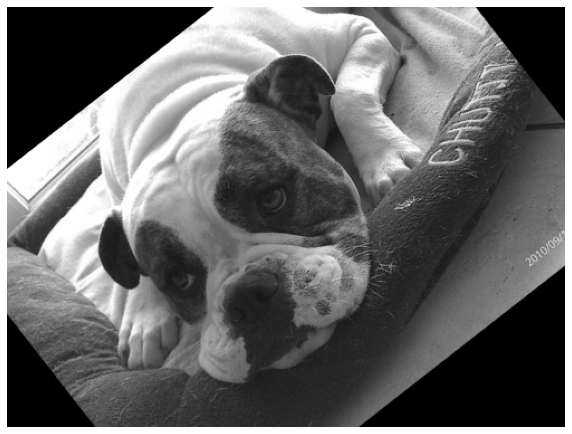

In [12]:
(cX, cY) = (w // 2, h // 2)
M = cv2.getRotationMatrix2D((cX, cY), 38, 1.0)
rot_img = cv2.warpAffine(img, M, (w, h))
#rot_img = rotate_image(img, 38) #or use this


rot_img_gray = cv2.cvtColor(rot_img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(rot_img_gray,cmap='gray')
rot_img_gray = np.array(rot_img_gray)


2740


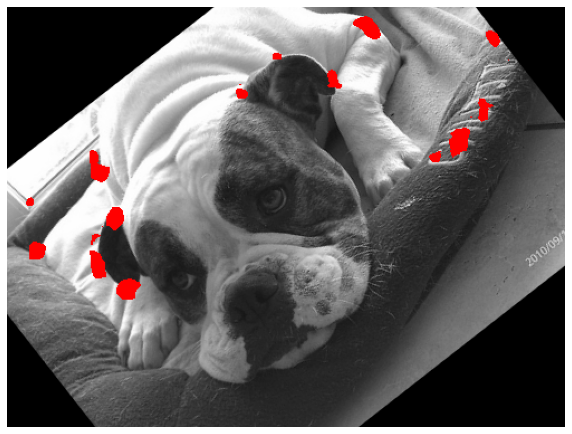

In [13]:
rot_img_hcd_resp = cv2.cornerHarris(rot_img_gray,20,5,0.04)
#result is dilated for marking the corners, not important
#hcd_resp = cv2.dilate(hcd_resp,None)
# Threshold for an optimal value, it may vary depending on the image.

rot_img_corners = cv2.cvtColor(rot_img_gray, cv2.COLOR_GRAY2BGR)

rot_img_threshold = 0.2*rot_img_hcd_resp.max()
rot_img_threshold = img_threshold

rot_img_corners[rot_img_hcd_resp>rot_img_threshold]=[0,0,255]

num_corners_rot = np.sum(rot_img_hcd_resp > rot_img_threshold)
print(num_corners_rot)

plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(rot_img_corners, cv2.COLOR_BGR2RGB))

In [14]:
def zoom(img, zoom, center=None):
    """
    Simple image zooming without boundary checking.
    Centered at "center", if given, else the image center.

    img: numpy.ndarray of shape (h,w,:)
    zoom: float
    center: (float, float)
    """
    # Translate to zoomed center
    h, w, _ = [ zoom * i for i in img.shape ]
    
    if center is None: cx, cy = w/2, h/2
    else: cx, cy = [ zoom*c for c in center ]
    
    #img = cv2.resize( img, (0, 0), fx=zoom, fy=zoom)
    img = cv2.resize( img, None, fx=zoom, fy=zoom)
    img = img[ int(round(cy - h/zoom * .5)) : int(round(cy + h/zoom * .5)),
               int(round(cx - w/zoom * .5)) : int(round(cx + w/zoom * .5)),
               : ]
    
    return img

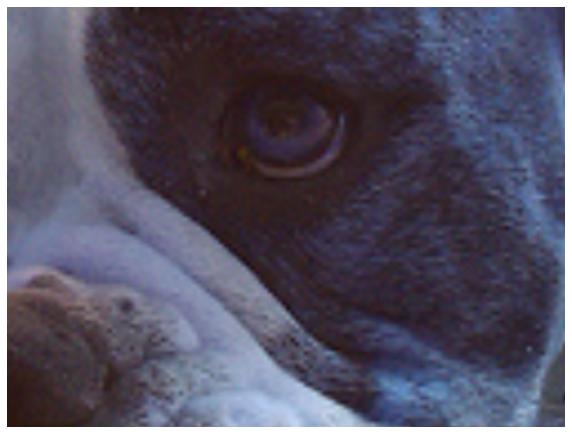

In [15]:
zoomed_img = zoom(img, 4)
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(zoomed_img,cmap='gray')
zoomed_img_gray = cv2.cvtColor(zoomed_img,cv2.COLOR_BGR2GRAY)
zoomed_img = np.array(zoomed_img)


799


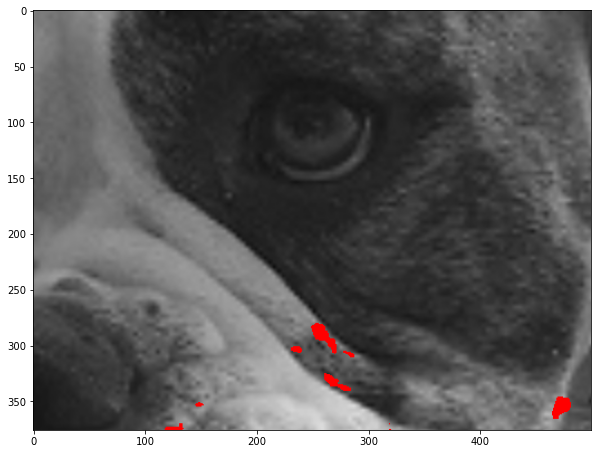

In [16]:
zoomed_img_hcd_resp = cv2.cornerHarris(zoomed_img_gray,20,5,0.04)
#result is dilated for marking the corners, not important
#hcd_resp = cv2.dilate(hcd_resp,None)
# Threshold for an optimal value, it may vary depending on the image.

zoomed_img_corners = cv2.cvtColor(zoomed_img_gray, cv2.COLOR_GRAY2BGR)

zoomed_img_threshold = 0.3*zoomed_img_hcd_resp.max()

zoomed_img_threshold = 0.03*img_threshold

zoomed_img_corners[zoomed_img_hcd_resp>zoomed_img_threshold]=[0,0,255]

num_corners_zoomed = np.sum(zoomed_img_hcd_resp > zoomed_img_threshold)
print(num_corners_zoomed)
plt.figure(figsize = [10, 10])
plt.axis('on')
plt.imshow(cv2.cvtColor(zoomed_img_corners, cv2.COLOR_BGR2RGB))

In [17]:
## Get HOG features from point

In [18]:
#keypoints = np.array(np.nonzero(zoomed_img_hcd_resp>zoomed_img_threshold))
zoomed_keypoints = np.argwhere(zoomed_img_hcd_resp>zoomed_img_threshold)
print(zoomed_keypoints,zoomed_keypoints.shape)
#keypoints = [cv2.KeyPoint(int(x[1]), int(x[0]), 1) for x in keypoints]
#print(keypoints)

[[280 253]
 [280 254]
 [280 255]
 ...
 [375 133]
 [375 319]
 [375 320]] (799, 2)


In [19]:
# Create Hog extractor
cell_size = (16, 16)  # h x w in pixels, don't change

block_size = (16, 16)  # h x w in cells, don't change
multiplier = 1
winsize = np.multiply(block_size,multiplier) #winsize has to be an integer multiple of block_size 

nbins = 9  # number of orientation bins

# full Hog setup
#hog = cv2.HOGDescriptor(_winSize=(zoomed_img_hcd_resp.shape[1] // cell_size[1] * cell_size[1],
#                                      zoomed_img_hcd_resp.shape[0] // cell_size[0] * cell_size[0]),
#                            _blockSize=(block_size[1] * cell_size[1],
#                                        block_size[0] * cell_size[0]),
#                            _blockStride=(cell_size[1], cell_size[0]),
#                            _cellSize=(cell_size[1], cell_size[0]),
#                            _nbins=nbins)

hog = cv2.HOGDescriptor(_winSize=winsize, _blockSize=block_size, _blockStride=cell_size, _cellSize=cell_size, _nbins=nbins)
#hog.compute(zoomed_img, locations=([(10, 11),(12,11)]))
zoomed_hog_feats = hog.compute(zoomed_img, locations=([(int(x[1]), int(x[0])) for x in zoomed_keypoints]))

In [20]:
#a simple check
zoomed_feats_per_keypoint = zoomed_hog_feats.shape[0]//zoomed_keypoints.shape[0]
print(zoomed_feats_per_keypoint) #should be equal to nbins but it can vary if you changed block_size etc. in Hog 

9


In [21]:
#reshape into the shape of descriptors that opencv requires: each row is a keypoint
zoomed_hog_feats_col=zoomed_hog_feats.reshape(zoomed_keypoints.shape[0],zoomed_feats_per_keypoint)
print('Hog features from zoomed image:',zoomed_hog_feats_col.shape,'\n')
assert (zoomed_hog_feats_col.shape[0] == num_corners_zoomed), "error in hog features"
assert zoomed_hog_feats_col.shape[1] == zoomed_feats_per_keypoint, "error in hog features"

Hog features from zoomed image: (799, 9) 



In [22]:
# make a copy of descriptors for checking purposes
copy_zoomed_hog_feats_col = np.array(zoomed_hog_feats_col)
print(copy_zoomed_hog_feats_col.shape)

(799, 9)


In [23]:
# initialize feature matcher
brute_force = cv2.BFMatcher()
no_of_matches_check = brute_force.match(zoomed_hog_feats_col,copy_zoomed_hog_feats_col)

# Apply ratio test
good = []
for m in no_of_matches_check:
    if m.distance < 0.005:
        good.append([m])

tot_feature_matches = len(good)
print('Number of matches:',tot_feature_matches,'\n') #should be equal to number of keypoints: zoomed_keypoints.shape[0]

Number of matches: 799 



In [24]:
#get hog features of initial image
initial_keypoints = np.argwhere(img_hcd_resp>img_threshold)
initial_hog_feats = hog.compute(img, locations=([(int(x[1]), int(x[0])) for x in initial_keypoints]))
initial_feats_per_keypoint = initial_hog_feats.shape[0]//initial_keypoints.shape[0]
print(initial_feats_per_keypoint)
initial_hog_feats_col = initial_hog_feats.reshape(initial_keypoints.shape[0],initial_feats_per_keypoint)
print('Hog features from initial image:',initial_hog_feats_col.shape,'\n')

9
Hog features from initial image: (4313, 9) 



In [25]:
# match features from initial and zoomed images
no_of_matches_initial_zoomed = brute_force.knnMatch(initial_hog_feats_col,copy_zoomed_hog_feats_col,k=2)
# Apply ratio test
good_iz = []
for m,n in no_of_matches_initial_zoomed:
    if m.distance < 0.75*n.distance:
        good_iz.append([m])

tot_feature_matches_iz = len(good_iz)
print('Total matches:',tot_feature_matches_iz,'\n') 

Total matches: 406 



In [26]:
#get hog features of rotated image
rot_keypoints = np.argwhere(rot_img_hcd_resp>rot_img_threshold)
rot_hog_feats = hog.compute(rot_img, locations=([(int(x[1]), int(x[0])) for x in rot_keypoints]))
rot_feats_per_keypoint = rot_hog_feats.shape[0]//rot_keypoints.shape[0]
rot_hog_feats_col = rot_hog_feats.reshape(rot_keypoints.shape[0],rot_feats_per_keypoint)
print('Hog features from rotated image:',rot_hog_feats_col.shape,'\n')

Hog features from rotated image: (2740, 9) 



In [27]:
# match features from initial and rotated images
no_of_matches_initial_rot = brute_force.knnMatch(initial_hog_feats_col,rot_hog_feats_col,k=2)
# Apply ratio test
good_ir = []
for m, n in no_of_matches_initial_rot:
    if m.distance < 0.75*n.distance:
        good_ir.append([m])

tot_feature_matches_ir = len(good_ir)
print('Total matches:',tot_feature_matches_ir,'\n') 

Total matches: 605 



In [28]:
# put the keypoints in the format that opencv requires
kp_z = ([(int(x[1]), int(x[0])) for x in zoomed_keypoints])
kp_i = ([(int(x[1]), int(x[0])) for x in initial_keypoints])
kp_r = ([(int(x[1]), int(x[0])) for x in rot_keypoints])
kp_i_cv = [cv2.KeyPoint(int(x[0]), int(x[1]), 1) for x in kp_i]
kp_z_cv = [cv2.KeyPoint(int(x[0]), int(x[1]), 1) for x in kp_z]
kp_r_cv = [cv2.KeyPoint(int(x[0]), int(x[1]), 1) for x in kp_r]



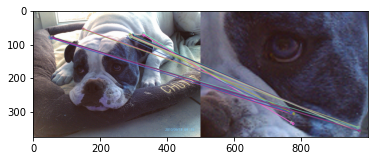

(<matplotlib.image.AxesImage at 0x22407790350>, None)

In [29]:
out = cv2.drawMatchesKnn(img, kp_i_cv,zoomed_img, kp_z_cv, good_iz[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(out), plt.show()

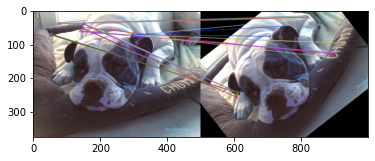

(<matplotlib.image.AxesImage at 0x22405d8ce90>, None)

In [30]:
out = cv2.drawMatchesKnn(img, kp_i_cv,rot_img, kp_r_cv, good_ir[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#out = cv2.drawMatches(gray, kp_i_cv,rot_img_gray, kp_r_cv, no_of_matches_initial_zoomed[:100], None,2) #if using bf.match
plt.imshow(out), plt.show()

In [31]:
#out = cv2.drawMatchesKnn(gray, kp_i_cv,zoomed_img_gray, kp_z_cv, good_iz,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)